## Your Name:  Umaid Ali Khalid

###  This exericse will take you through the complete cycle of loading, exploring, and preprocessing data, training and testing a a basic multilayer perceptron neural networks 

### Step 1 – Data Acquisition
Load the training data 'house_prices_train.csv' into a dataframe. Explore the data to get a better understanding of its structure and any data preparation steps that you need to perform.

In [1]:
#import any required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
#Load the data and view the dimensions

file     = 'house_prices_train.csv'
data     = pd.read_csv(file)
data_dim = data.shape

print ('There are {} rows and {} columns.'.format(data_dim[0], data_dim[1]))

There are 1460 rows and 81 columns.


Lets view samples of the data

In [3]:
#view a few observations
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Use your intuition!
At first glance is there any field that, without a doubt, will not contribute to the predictions?

#### Exercise 1: Remove/exclude any unnecessary field(s) that will not contribute towards the prediction

In [4]:
del data['Id']
del data['Alley']
del data['FireplaceQu']

### Step 2 – Data Exploration
- Gather summary/descriptive statistics and inspect **all the fields**. This can help you to identify outliers and detect any inconsistencies
- View the frequency of missing values.

#### Exercise 2: Gather descriptive statistics to view the range of values in each field. 

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


#### Exercise 3: Show the frequency of missing values

In [6]:
pd.options.display.max_rows = 81
data.isna().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBa

#### Exercise 4: State your observations about the summary statistics and missing values
Note: recall that not all missing values need to be deleted, some of them can be imputed.

#### <font color='blue'>It looks like there are few of the columns that needs to be deleted based on the observation of data and everything else seems alright</font>

In [7]:
del data['PoolQC']
del data['MiscFeature']
#Delete Misc values since misc features are missing
del data['MiscVal']
del data['Fence']

In [8]:
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,40,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,60,0,0,0,0,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,112,0,0,0,4,2010,WD,Normal,142125


#### Exercise 5: List the continuous and categorical data and state any discrepancy between the number of expected records in the dataset and the "count"  that is reported above. 

For the fields that are discussed, view `data_description.txt` which explains the range of values for each field. What does this tell you about these 'missing' values. How do you recommend addressing them? **(You do not need to demonstrate your recommendations)**

In [9]:
import numpy as np
Categorical=data.loc[:,data.dtypes==np.object]
Continuous=data.loc[:,data.dtypes!=np.object]

In [10]:
Categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
MSZoning         1460 non-null object
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 non-null object
ExterQual        1460 non-null object
ExterCond        1460 non-null object
Foundation       1460 non-null object
BsmtQual         1423 non-null object
BsmtCond         1423 non-null object
BsmtExposure     1422 non-null object
BsmtFinType1     14

In [11]:
Continuous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 36 columns):
MSSubClass       1460 non-null int64
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
MasVnrArea       1452 non-null float64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
Fireplaces       1460 non-null int64
G

## <font color='blue'>Based on the data from Exercise 4</font>
### Continuous data has less number of columns compared to Categorical data.
### <font color='red'>In categorical data</font>
#### Following variable contains missing values:MasVnrType, BsmtQual, BsmtCond, BsmtExposure,BsmtFinType1,BsmtFinType2   
### <font color='red'>In continuous data</font>
#### Following variable contains missing values:LotFrontage,MasVnrArea, GarageYrBlt     
### <font color='green'>How to handle missing data</font>
#### To deal with missing data, utilize built in python functions to fill in the missing values such as <font color='red'>interpolation</font>  or delete the columns with most of the missing values that have been done already!

#### Exercise 6: The dependent variable:
Are there any discrepancies with the dependent variable? Plot a histogram showing its distribution. Is the distribution skewed?  
**Hint:
Can a logarithmic scale on y-axis give us a better perspective?

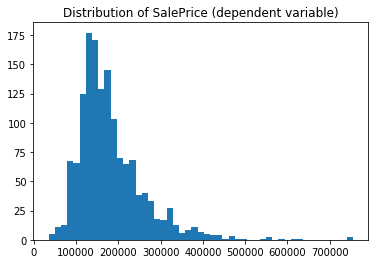

In [12]:
import numpy as np
Sdepend = data[['SalePrice']]
Sdepend=Sdepend.to_numpy()
plt.title('Distribution of SalePrice (dependent variable)')
plt.hist(Sdepend, bins='auto')
#plt.plot(trip)
plt.show()

#### <font color='blue'>Yes, distribution is skewed right</font>

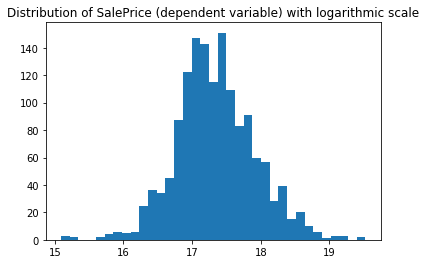

In [13]:
Sdepend=np.log2(data[['SalePrice']])
Sdepend=Sdepend.to_numpy()
plt.title('Distribution of SalePrice (dependent variable) with logarithmic scale')
plt.hist(Sdepend, bins='auto')
#plt.plot(trip)
plt.show()

#### <font color='blue'>Yes,logarithmic scale on y-axis seems to give us a better perspective</font>

## Building the Pipeline
Based on your recommendations above, lets build a pipeline that does the following:
- prepare the data and perform data imputation
- transform the continuous and categorical data (scaling and encoding respectively)
- select the useful features e.g. feature selection, *you can optionally include this in the pipeline or perform this step prior to building the pipeline*
- build, train and evaluate the neural network using Keras.
- perform hyper-parameter tuning using RandomSearchCV **(optional)**
- make predictions with new data

### Step 3 – Data Preparation
Here is some helpful information on [preprocessing and feature extraction pipelines in scikit-learn](https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html)

<span style="color:red">NOTE: You can modify the cell below to suit your needs. However, ensure that the preprocessing steps that you perform is done in the data frame e.g. `data` </span>

#### Exercise 7: Impute missing continuous values with the median and scale the data:
In the cell below complete the list of "continuous_features" with continuous variable column names.  Once you run the pipeline, remove any variable columns that will not go through pipelines.

In [14]:
#list of continuous fields that will be used in the model(except the dependent variable)
del Continuous['SalePrice']
continuous_features  = list(Continuous.columns)

#The tranformer below does both filling in missing values with median of the column and scale the column with StandardScaler
continous_transformer = Pipeline(
    steps = [
    ('imputer', SimpleImputer(strategy = 'median')),
    ('scaler', StandardScaler())
    ])

#### Exercise 8: Impute missing categoriacal values with the median and scale the data:
In the cell below complete the list of "categorical_features" with categorical variable column names. Once you run the pipeline, remove any variable columns that will not go through pipelines.

In [15]:
#Create the list of categorical fields that will be used in the model
categorical_features = list(Categorical.columns)

#The tranformer below does both filling in missing values as indicated for the categorical columns and 
#then transform those columns  into one hot encoded variables
categorical_transformer = Pipeline(
    steps = [
    ('imputer', SimpleImputer(strategy = 'constant', fill_value = 'NotApp')), #Use an alternative value to indicate NA in the dataset
    ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
    ])

In [16]:
data_preprocessor   = ColumnTransformer(
    transformers = [
        ('continious', continous_transformer, continuous_features),
        ('categorical', categorical_transformer, categorical_features)
    ])
#NOTE: the steps above will not be performed until we call `fit_transform` (in the next cell).

### Step 4 – Data Transformation & Feature Selection
Here is some helpful information on [feature selection as part of a pipeline](https://scikit-learn.org/stable/modules/feature_selection.html#feature-selection-as-part-of-a-pipeline). If you add a feature selection algorithm to the pipeline, ensure that it supports regression.

In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [18]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

data_prep_pipeline  = Pipeline(steps=[('preprocessor', data_preprocessor), #This performs the data preparation steps in the cell above
                                      ('feature_selection', SelectFromModel(LinearSVC(penalty="l2",max_iter=2000)))
                    ])

In [19]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,12,2008,WD,Normal,250000


In [20]:
transformed_data    = data_prep_pipeline.fit_transform(data.iloc[:,:-1], data['SalePrice']) #transform the data

### Step 5 – Building the Model
#### Build the neural network using Keras
Building a feed forward neural network with: an input layer, hidden layers and one output layer. 
You only need to provide the hidden layers.

#### Exercise 9: Build your neural networks model
In the cell below complete the section under add hidden (add at least three).  


In [21]:
X = pd.DataFrame(transformed_data.toarray()) #this is the transformed data from the pipeline
y = data['SalePrice'] #this is the output

#Build a sequential model with at least three dense layers (you can add more layers as needed)
#Note: you can also add this keras model to the data preprocessing pipeline but we can skip that step for now.
ffnn_model = Sequential()
## Add hidden layers, one line at time, below
ffnn_model.add(Dense(1024,activation='relu'))
ffnn_model.add(Dense(512,activation='relu'))
ffnn_model.add(Dense(128,activation='relu'))
ffnn_model.add(Dense(64,activation='relu'))
ffnn_model.add(Dense(32,activation='relu'))
ffnn_model.add(Dense(16,activation='relu'))
#Here is the oddput layer
ffnn_model.add(Dense(1, activation='linear'))



#There are options you may want to change and try to improve performance.
ffnn_model.compile(optimizer= 'adam', 
                   loss= 'mean_absolute_error', 
                   metrics= 'mae'  
                  )

ffnn_history = ffnn_model.fit(X, y, 
                              validation_split= 0.2, 
                              epochs= 200, 
                              batch_size= 100,
                              verbose=1)

Epoch 1/200
12/12 [==============================] - 2s 95ms/step - loss: 180421.4844 - mae: 180421.4844 - val_loss: 182181.9531 - val_mae: 182181.9531
Epoch 2/200
12/12 [==============================] - 0s 19ms/step - loss: 178206.7103 - mae: 178206.7103 - val_loss: 181206.2812 - val_mae: 181206.2812
Epoch 3/200
12/12 [==============================] - 0s 27ms/step - loss: 175401.2416 - mae: 175401.2416 - val_loss: 173234.2969 - val_mae: 173234.2969
Epoch 4/200
12/12 [==============================] - 0s 19ms/step - loss: 162238.9615 - mae: 162238.9675 - val_loss: 127996.3281 - val_mae: 127996.3281
Epoch 5/200
12/12 [==============================] - 0s 19ms/step - loss: 99788.3377 - mae: 99788.3377 - val_loss: 64567.2812 - val_mae: 64567.2812
Epoch 6/200
12/12 [==============================] - 0s 19ms/step - loss: 57210.7395 - mae: 57210.7395 - val_loss: 43504.4023 - val_mae: 43504.4023
Epoch 7/200
12/12 [==============================] - 0s 18ms/step - loss: 37393.8056 - mae: 3739

Epoch 56/200
12/12 [==============================] - 0s 18ms/step - loss: 12277.1433 - mae: 12277.1433 - val_loss: 18852.5059 - val_mae: 18852.5059
Epoch 57/200
12/12 [==============================] - 0s 18ms/step - loss: 12918.1328 - mae: 12918.1328 - val_loss: 18020.7520 - val_mae: 18020.7520
Epoch 58/200
12/12 [==============================] - 0s 18ms/step - loss: 13310.6113 - mae: 13310.6113 - val_loss: 18063.0117 - val_mae: 18063.0117
Epoch 59/200
12/12 [==============================] - 0s 17ms/step - loss: 11651.7867 - mae: 11651.7867 - val_loss: 18318.9258 - val_mae: 18318.9258
Epoch 60/200
12/12 [==============================] - 0s 19ms/step - loss: 13555.8187 - mae: 13555.8187 - val_loss: 18012.5957 - val_mae: 18012.5957
Epoch 61/200
12/12 [==============================] - 0s 19ms/step - loss: 11844.2749 - mae: 11844.2749 - val_loss: 18551.0547 - val_mae: 18551.0547
Epoch 62/200
12/12 [==============================] - 0s 29ms/step - loss: 12883.7880 - mae: 12883.7880 - 

Epoch 111/200
12/12 [==============================] - 0s 15ms/step - loss: 10649.0122 - mae: 10649.0122 - val_loss: 18258.4785 - val_mae: 18258.4785
Epoch 112/200
12/12 [==============================] - 0s 16ms/step - loss: 11159.4729 - mae: 11159.4729 - val_loss: 17813.9434 - val_mae: 17813.9434
Epoch 113/200
12/12 [==============================] - 0s 18ms/step - loss: 10192.3699 - mae: 10192.3698 - val_loss: 18023.7637 - val_mae: 18023.7637
Epoch 114/200
12/12 [==============================] - 0s 17ms/step - loss: 10518.5142 - mae: 10518.5142 - val_loss: 17883.7578 - val_mae: 17883.7578
Epoch 115/200
12/12 [==============================] - 0s 18ms/step - loss: 10809.4289 - mae: 10809.4293 - val_loss: 17620.9844 - val_mae: 17620.9844
Epoch 116/200
12/12 [==============================] - 0s 17ms/step - loss: 11687.1893 - mae: 11687.1893 - val_loss: 17814.3203 - val_mae: 17814.3203
Epoch 117/200
12/12 [==============================] - 0s 18ms/step - loss: 10562.8432 - mae: 10562.

Epoch 166/200
12/12 [==============================] - 0s 17ms/step - loss: 9137.2058 - mae: 9137.2058 - val_loss: 17762.6777 - val_mae: 17762.6777
Epoch 167/200
12/12 [==============================] - 0s 17ms/step - loss: 9461.2948 - mae: 9461.2948 - val_loss: 17759.2578 - val_mae: 17759.2578
Epoch 168/200
12/12 [==============================] - 0s 18ms/step - loss: 8479.7082 - mae: 8479.7086 - val_loss: 17682.9434 - val_mae: 17682.9434
Epoch 169/200
12/12 [==============================] - 0s 19ms/step - loss: 8985.5848 - mae: 8985.5848 - val_loss: 17599.4238 - val_mae: 17599.4238
Epoch 170/200
12/12 [==============================] - 0s 18ms/step - loss: 8125.0123 - mae: 8125.0123 - val_loss: 17603.5820 - val_mae: 17603.5820
Epoch 171/200
12/12 [==============================] - 0s 17ms/step - loss: 8046.9729 - mae: 8046.9729 - val_loss: 17684.4785 - val_mae: 17684.4785
Epoch 172/200
12/12 [==============================] - 0s 18ms/step - loss: 9166.0955 - mae: 9166.0955 - val_los

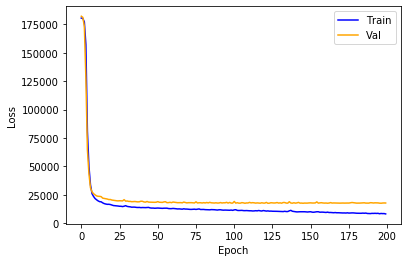

In [22]:
# Now let us Visualize the training and validation loss
plt.plot(ffnn_history.history['loss'], 'b', ffnn_history.history['val_loss'], 'orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

### Let's use the neural network to make predictions!

#### Exercise 10: Load the test data

Now load the data from `house_prices_test.csv`

In [23]:
#Load the data and view the dimensions

file     = 'house_prices_test.csv'
data2     = pd.read_csv(file)
data_dim = data2.shape

print ('There are {} rows and {} columns.'.format(data_dim[0], data_dim[1]))

There are 1459 rows and 80 columns.


#### Exercise 11: Prepare the test data using the same pipeline used from preparing the training data.
1. Remove/exclude the unnecessary field(s) that will not contribute towards the prediction or will not go through pipelines.
2. Run through the same pipeline used for training data.  This will impute any missing values and scale/encode the fields.

In [24]:
del data2['Id']
del data2['Alley']
del data2['FireplaceQu']
del data2['PoolQC']
del data2['MiscFeature']
del data2['MiscVal']
del data2['Fence']


In [25]:
test_data    = data_prep_pipeline.transform(data2) #transform the data

#### Exercise 12: Use the neural network to make predictions
Now use the model to make predictions on the test set.


In [26]:
X = pd.DataFrame(test_data.toarray())
Sample=ffnn_model.predict(X)
Sample

array([[120531.89],
       [152652.44],
       [187146.81],
       ...,
       [177374.27],
       [121059.85],
       [230045.83]], dtype=float32)

#### Exercise 13: Summary
Display samples of the predictions from your model and summarize your thoughts on the model's performance, the training process and its ability to generalize with new data. Are their any recommendations to improve the model in the future?

### <font color='green'>Summary</font>
#### <font color='red'>Sample is already shown on previous cell!</font>
####  <font color='blue'>Thoughts on model performance:</font>
##### 1. Model seems to predict house prices quite right
##### 2. Making a use of pipeline to scale and convert data is absolutely very useful to get a best accuracy for model
##### 3. Overall, model definitely works better for making prediction. However, adding some more hidden layers and using different activations in model may have provided us with more accurate results!